# Prosessering av Scanning Electron Diffraction (SED) data

Denne Jupyter Notebooken viser hvordan Scanning Electron Diffraction (SED) data kan analyseres. Sammenlignet med analyse av "standard" TEM data som dere så på i forrige Notebook, så er dette mer komplisert på grunn av datastørrelsen: det er veldig enkelt å gå tom for minne, noe som (mest sannsynlig) gjør at datamaskinen deres kræsjer.

### Målet med denne notebooken

- Dere skal kunne prosessere SED datasettene fra TEM-laben
- Bli komfortable med å jobbe med 4-dimensjonelle datasett
- Lære litt enkle verktøy og strategier for å jobbe med store datasett, som ofte er mye større en tilgjengelig minne

### Notebook-planen

- "Åpne" datasettet uten å laste det inn i minnet, "lazily"
- Utforske datasettet, via å redusere datamengden
- Redusere datamengden, slik at vi kan laste det inn i minnet
- Finne, og hente ut, individuelle diffraksjonsmønster

Eksempel på bilde:

<img src="bilder/sed_plot_example.jpg" width=600 height=600 />

Selve datasettene dere skal se på her er på ca. 8 GB, noe som er ganske smått i "4-D STEM" verdenen: disse kan lett være 100+ GB. Så selv om dere har en datamaskin som takler 8 GB, så anbefaler jeg at dere følger prosedyren for å redusere datastørrelsen.

## Importere biblioteker

Først, plotte-biblioteket. Dette kan enten være `%matplotlib qt` for egne vinduer for plottene, eller `%matplotlib widget` for å få plottene i selve Jupyter Notebooken.

In [1]:
%matplotlib widget

Så importere HyperSpy

In [2]:
import hyperspy.api as hs

## Åpne dataset

Dette gjøres via `hs.load`, som kan åpne en rekke dataformater, spesielt innenfor elektronmikroskopi. Velg `datasett/scanning_electron_diffraction_data.zspy`

- `.hspy` filformat
- Ha filnavn som IKKE inneholder: `stem_dpc`, `STEMDPC`, `LowMag`, `Low_Mag`, `lowmag`, `obj_off` eller `OBJOFF`
- Som KAN inneholde: `SED` eller `sed`

Siden disse er ganske store, så husk å bruk `lazy=True`. Lag et objekt som heter `s`.

Tips: sjekk docstring for informasjon om hvordan `hs.load` virker.

In [3]:
s = hs.load("datasett/scanning_electron_diffraction_data.zspy", lazy=True)

Skriv `print(s)` i cellen under, og kjør cellen.

In [4]:
print(s)

<LazyElectronDiffraction2D, title: , dimensions: (256, 256|256, 256)>


Her ser vi at dette er et `LazyElectronDiffraction2D` signal. `Lazy` betyr at dataene er ikke overført til RAM, ergo at dataene ennå bare er på harddisken. I tillegg ser vi at datasettet har `256 x 256` probe-posisjoner, og `256 x 256` detektorposisjoner. Hvert datapunkt er en 16-bit heltall, som gir 2 bytes. Dette gir en datastørrelse på: `256 * 256 * 256 * 256 * 2`, som er ca. 8.6 gigabytes.

En del av dere har nok en datamaskin som kan takle dette, men la oss prøve å redusere datamengden litt.

**VIKTIG:** det er veldig lett å kræsje datamaskinen når man holder på med såpass store datasett. Så pass på at dere har lagret ting dere har åpent.

## Plotting av dataen

`s` er et signal objekt som inneholder mange funksjoner. Et av disse er `plot`, prøv denne med argumentet `norm="symlog"`. Dette gjør at signal dimensjonen blir plottet i log-log, som gjør det lettere å se de svake diffraksjonsdiskene. Siden dette er et `lazy` signal, så må HyperSpy kalkulere et navigasjonsbilde ved å hente ut deler (`chunks`) av gangen.

Denne navigeringen kan "hakke" litt, dette fordi alt må leses fra harddisken. Planen nå er å redusere datastørrelsen, slik at vi kan laste alt inn i minnet, men først vil vi utforske datasettet litt for å se hvor mye vi kan redusere datasettet.

Dere får opp to bilder: "navigeringsplot" og "signalplot".

<img src="bilder/SED_plot_nav_og_sig.jpg" width=700 height=700 />

- Tips 1: navigatoren kan gjøres større ved å trykke på `+` knappen på **tastaturet**. Og mindre med å trykke på `-` knappen på **tastaturet**. Dette summerer IKKE flere piksler, men er bare en måte å lettere treffe navigator-markøren.
- Tips 2: dere kan også flytte rundt med pil-tastene.

(Siden folk har litt forskjellige datasett, så er det sannsynlig at ikke alt dette er relevant for alle.)

[########################################] | 100% Completed | 3.42 sms


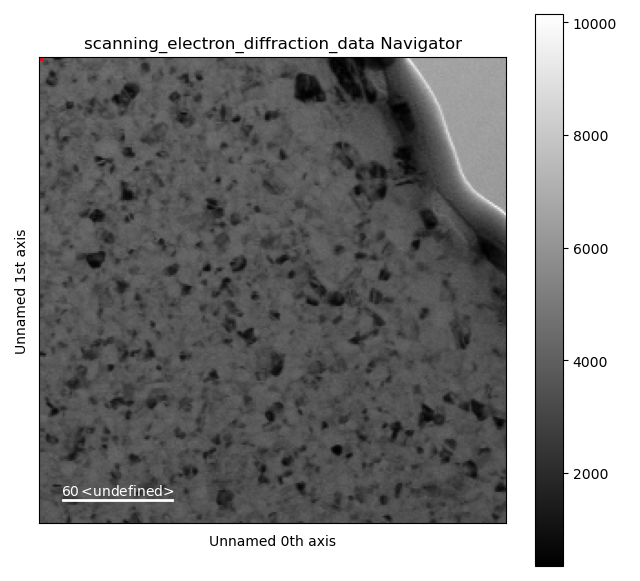

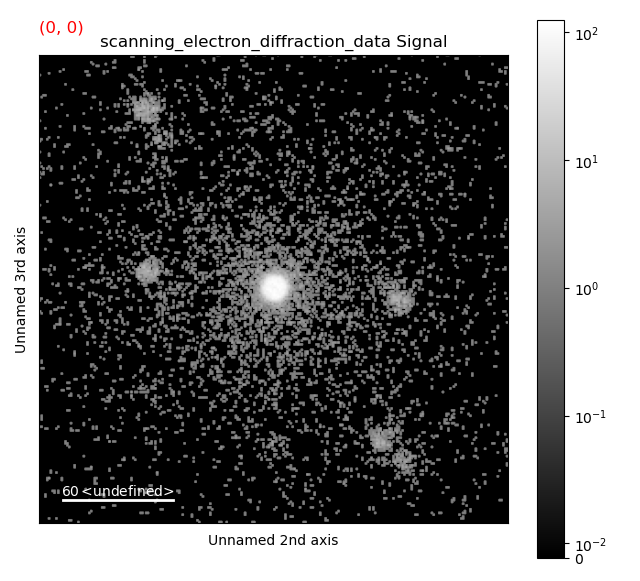

In [5]:
s.plot(norm="symlog")

Det som er mest interessant i disse datasettene, er hvordan diffraksjonsbildene ser ut i de forskjellige områdene.

Dette brukes til å finne ut hva slags krystall-struktur vi har.

Men først, så lager vi et litt mindre datasett, som brukes til å utforske datasettet.

Finn senter-posisjonen til senter-disken:

<img src="bilder/sed_senter_av_senterdisk.jpg" width=700 height=700 />

Så bruk `radial_average` med `x` som `centre_x` og `y` som `centre_y` parameterne, til å lage en ny variabel `s_r`.

In [4]:
s_r = s.radial_average(127, 127)

c:\Users\matmy\anaconda3\envs\pyxem\lib\site-packages\pyxem\signals\diffraction2d.py:1629: FutureWarning: This method is deprecated, and will be removed in version 0.14.0, please use .get_azimuthal_integral1d
  warnings.warn(
100%|██████████| 64/64 [04:02<00:00,  3.79s/it]


Dette nye `s_r` signalet er antall elektroner som en funksjon av spredningsvinkel, og er mye mindre enn `s`. Dette fordi vi har redusert datasettet fra 4-dimensjoner til 3-dimensjoner.

Nå kan vi utforske datasettet på en enkel og rask måte, siden det er lite nok til å lastes inn i minnet.

Bruk `s_r.T.plot()` for å visualisere prøven. Med denne kan vi navigere datasettet som en funksjon av spredningsvinkelen, som gjør at vi lett kan bytte mellom virtuell "bright field", virtuell "annular dark field (ADF)" og "medium angle ADF (MAADF)" og "high angle ADF (HAADF)". Dette gjøres ved å trykke på og dra den røde navigator linjen (se bilde), eller ved å bruke piltastene på tastaturet.

<img src="bilder/radial_average_example.jpg" width=500 height=500 />

## Finne diffraksjonsmønstre

Etter å ha utforsket materialet litt, så finn noen interessante områder. Noter ned x- og y-posisjonene til disse.

<img src="bilder/sed_get_xy_position.jpg" width=900 height=900 />

Så, bruk `.inav` til å plukke ut disse posisjonene, som du kan bruke til å lage signal med diffraksjonsbilder. Dette bruker dere så til å lage plot med både navigasjonssignal, og med diffraksjonsbildene. Dette for å vise hva slags strukturer vi har.

Bruk `.inav[x, y]` til å lage signaler: `s_diff0`, `s_diff1`, ... som viser hvordan strukturen er på forskjellige steder.

For noen av disse posisjonen, så kan signalet være litt dårlig. Hvis dette er tilfellet, så kan dere summere de nærliggende probe-posisjonene. F.eks. ved å bruke `s.inav[x0:x1, y0:y1].sum()`.

Merk: disse er `lazy` signaler, så kjør `.compute()` på dem!

### Lage oversiktsbilde

En enkel måte å lage et oversiktsbilde, er å summere intensiteten i diffraksjonsmønsteret. Gjør dette med `sum` funksjonen i `s`, bruk argumentet `axis=(-1, -2)`.

Lag en ny variabel: `s_oversikt`

Så kjør `compute()` funksjonen i `s_oversikt`

## Lage figur

Bruk disse til å lage en figur med oversiktsbilde + diffraksjonsbilder.

Noe som ligner på eksemplet helt i starten av denne Notebooken.

### Plotting av diffraksjonsbilder

Disse har ofte veldig store variasjoner i intensitet, så det er best å plotte disse i log-log plot. Gjør dette med:

```python
import matplotlib.colors as colors
norm = colors.SymLogNorm(1, vmin=1, vmax=s_diff0.data.max())
```

Så bruk `ax.imshow(..., norm=norm)`. Ergo så må dette gjøres for hvert diffraksjonsbilde